(-7.0, 7.0)

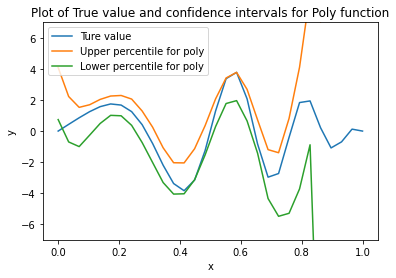

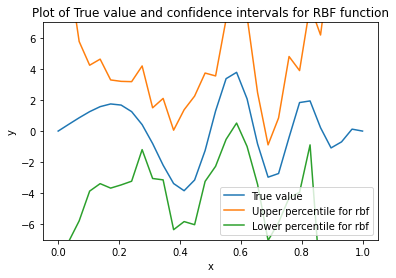

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import math

B = 300
def bootstrap(x,y,B,fun):
  x = np.array(x)
  resampled_stat = []
  for k in range(B):
    index = np.random.randint(0,len(x),len(x))
    index = np.sort(index)
    # sample = x[index]

    sample = x[index]
    sample_y = y[index]
    
    bstat = fun(sample,sample_y,x)
    # print(np.shape(bstat))
    resampled_stat.append(bstat)

  return resampled_stat



def f_poly_func(x,y,x_original):
  lamb = 0.001
  d=30
  n=len(x)
  # x_original = np.reshape(x_original,(n,1))
  # II = np.ones(30)
  # II = np.reshape()
  x_train = np.dot(x,x.T)
  II = np.ones(n)
  II = np.reshape(II,(n,1))
  I = np.eye(n)
  ke_poly = (II+x_train)**d



  alpha_cap = np.dot((np.linalg.solve(ke_poly+lamb*I,I)),y)
  # print(alpha_cap)
  # x_original = np.reshape(x_original,(n,1))
  new_ke = lambda r: (1+np.dot(x,r))**d

  ke_poly = []
  for i in range(n):
    
    ke_poly.append(new_ke(x_original[i]).reshape(-1))
  # ke_poly = np.apply_along_axis(lambda r: (1+np.dot(x,r))**d,0,x_original)
  ke_poly = np.array(ke_poly)
  # print(np.shape(ke_poly))
  # ke_poly = ke_poly[:,:,0]
  
  f_cap_poly = np.dot(ke_poly,alpha_cap)
  # print(f_cap_poly)
 
  return f_cap_poly

def f_rbf_func(x,y,x_original):
  lamb = 0.000001
  gamma = 40
  n=len(x)
  I = np.eye(n)
  z = np.zeros((len(x),len(x)))
  for t in range(len(x)):
    z[t,:] = ((x[t,:] - x)).T    
  ke_rbf = np.exp(-gamma * (z**2))
  alpha_cap = np.dot((np.linalg.inv(ke_rbf+lamb*I)),y)

  krbf = lambda r: np.exp(- gamma * ((x - r)**2))

  ke_rbf = []
  for i in range(n):
    # x_train = x - x_original[i] ** 2
    ke_rbf.append(krbf(x_original[i]).reshape(-1))
  ke_rbf = np.array(ke_rbf)
  #ke_rbf = ke_rbf[:,:,0]


  f_cap_rbf = np.dot(ke_rbf,alpha_cap)
  return f_cap_rbf

n = 30
y = []
X = []

#x = np.random.uniform(size=n)
x = np.linspace(0,1,n)
eps = np.random.normal(0,1,n)
x = np.sort(x)
f = 4*np.sin(math.pi*x)*np.cos(6*math.pi*x*x)

y = f + eps

x = np.reshape(x,(n,1))

f_cap_poly_boot = bootstrap(x,y,B,f_poly_func)
f_cap_rbf_boot = bootstrap(x,y,B,f_rbf_func)

f_cap_poly_boot = np.reshape(f_cap_poly_boot,(B,n))
f_cap_rbf_boot = np.reshape(f_cap_rbf_boot,(B,n))


Upoly = np.quantile(f_cap_poly_boot,0.95,axis=0)
Lpoly = np.quantile(f_cap_poly_boot,0.05,axis=0)

Urbf = np.quantile(f_cap_rbf_boot,0.95,axis=0)
Lrbf = np.quantile(f_cap_rbf_boot,0.05,axis=0)



plt.figure()
plt.plot(x,f,label = 'Ture value')
plt.plot(x,Upoly,label = 'Upper percentile for poly')
plt.plot(x,Lpoly,label = 'Lower percentile for poly')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Plot of True value and confidence intervals for Poly function")
plt.ylim(-7,7)


plt.figure()
plt.plot(x,f,label = 'True value')
plt.plot(x,Urbf,label = 'Upper percentile for rbf')
plt.plot(x,Lrbf,label = 'Lower percentile for rbf')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Plot of True value and confidence intervals for RBF function")
plt.ylim(-7,7)
